In [1]:
# Import required libraries
import pandas as pd
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# Create a dash application
app = dash.Dash(__name__)

# Build dash app layout
app.layout = html.Div(children=[ html.H1('Flight Delay Time Statistics', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 30}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', 
                                type='number', style={'height':'35px', 'font-size': 30}),], 
                                style={'font-size': 30}),
                                html.Br(),
                                html.Br(), 
                                # Segment 1
                                html.Div([
                                        html.Div(dcc.Graph(id='carrier-plot')),
                                        html.Div(dcc.Graph(id='weather-plot'))
                                ], style={'display': 'flex'}),
                                # Segment 2
                                html.Div([
                                        html.Div(dcc.Graph(id='nas-plot')),
                                        html.Div(dcc.Graph(id='security-plot'))
                                ], style={'display': 'flex'}),
                                # Segment 3
                                html.Div(dcc.Graph(id='late-plot'), style={'width':'65%'})
                                ])

""" Compute_info function description

This function takes in airline data and selected year as an input and performs computation for creating charts and plots.

Arguments:
    airline_data: Input airline data.
    entered_year: Input year for which computation needs to be performed.
    
Returns:
    Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.

"""
def compute_info(airline_data, entered_year):
    # Select data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

"""Callback Function

Function that returns fugures using the provided input year.

Arguments:

    entered_year: Input year provided by the user.
    
Returns:

    List of figures computed using the provided helper function `compute_info`.
"""
# Callback decorator
@app.callback( [
               Output(component_id='carrier-plot', component_property='figure'),
               Output(component_id='weather-plot', component_property='figure'),
               Output(component_id='nas-plot', component_property='figure'),
               Output(component_id='security-plot', component_property='figure'),
               Output(component_id='late-plot', component_property='figure')
               ],
               Input(component_id='input-year', component_property='value'))
# Computation to callback function and return graph
def get_graph(entered_year):
    
    # Compute required information for creating graph from the data
    avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_info(airline_data, entered_year)
            
    # Line plot for carrier delay
    carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrrier delay time (minutes) by airline')
    # Line plot for weather delay
    weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
    # Line plot for nas delay
    nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
    # Line plot for security delay
    sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
    # Line plot for late aircraft delay
    late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')
            
    return[carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]

# Run the app
if __name__ == '__main__':
    app.run_server()

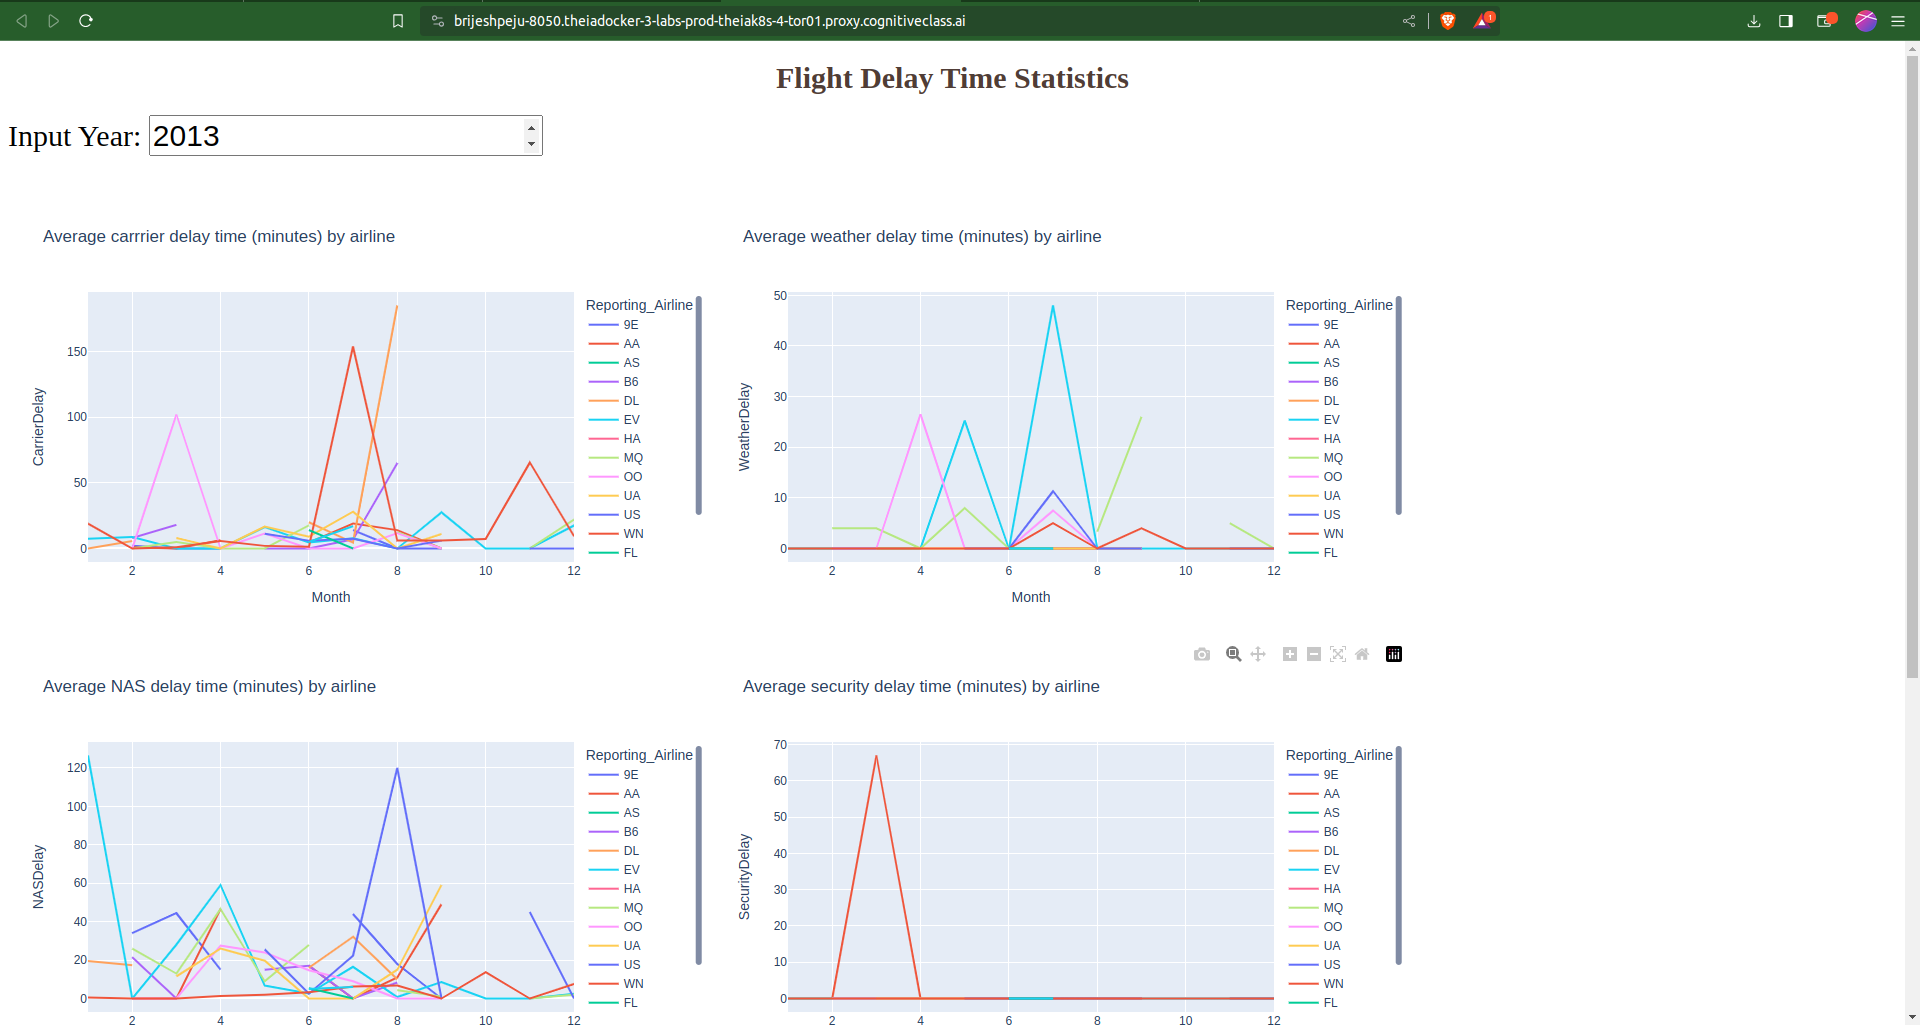

In [3]:
from IPython.display import Image
Image("/home/brijesh/Pictures/Screenshots/output.png")